# Importing required libraries

We’ll use `pandas`, `numpy`, `seaborn`, and `matplotlib` for data handling and visualization, and `scikit-learn` for preprocessing (imputation and scaling).


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

**Loading data**

The Titanic dataset contains passenger information such as age, fare, and survival status. It also has missing values, making it perfect for demonstrating data imputation techniques.


In [35]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Checking for missing values**

Before handling missing data, let’s visualize and count how many values are missing in each column.

In [36]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**Checking for missing values by Heatmap**

<Axes: >

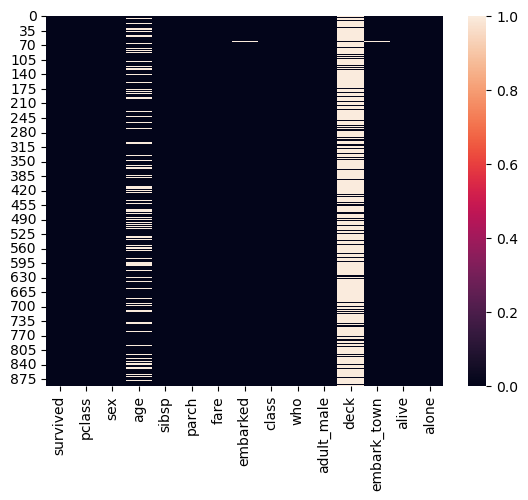

In [37]:
sns.heatmap(df.isna())

**Selecting Input and Output variables**

We’ll focus on a few numerical and categorical features that contain missing values, along with the target variable `survived`.

In [38]:
X = df[['age','fare','pclass','embarked','embark_town']]
y= df['survived']

**Splitting data into training and testing data**

To avoid data leakage, we’ll split the data before applying any preprocessing steps.

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

**Selecting numerical and categorical columns**

We’ll handle missing values differently for numeric and categorical columns.

In [40]:
cat_col = ['pclass','embarked','embark_town']
num_col = ['age','fare',]

**Imputing categorical columns**

For categorical variables, we’ll replace missing values with the **most frequent** category.

In [41]:
cat_pipe = Pipeline([
    ('cat_imputer',SimpleImputer(strategy='most_frequent'))
])

**Scaling and imputing numerical columns**

The numeric pipeline imputes missing values using **KNN Imputer** and then scales them with **MinMaxScaler**.

In [42]:
num_pipe = Pipeline([
   ('num_imputer',KNNImputer()),
   ( 'scaling data',MinMaxScaler())
])

**Applying numerical and categorical imputation on dataset by columnTransformer**

`ColumnTransformer` allows us to apply different preprocessing steps to numeric and categorical columns simultaneously.

In [43]:
preprocessing = ColumnTransformer([
    ('num',num_pipe,num_col),
    ('cat_preprocessing',cat_pipe,cat_col)
])

**Apply transformation**

We’ll now fit the preprocessing pipeline on the training data and transform both training and test sets.

In [44]:
X_train_clean = preprocessing.fit_transform(X_train)
X_test_clean = preprocessing.transform(X_test)


**Converting numPy array back into dataFrame**

Let’s convert the NumPy arrays back into DataFrames for better readability and verification.

In [45]:
col = num_col+cat_col

In [46]:
X_train_clean = pd.DataFrame(X_train_clean,columns = col,index=X_train.index) # Here I have done without one hot encoding, so this simple method is useful
X_test_clean = pd.DataFrame(X_test_clean,columns = col,index=X_test.index)

**Checking missinig values again**

After preprocessing, all missing values should be imputed. Let’s confirm by visualizing the cleaned data.

In [47]:
X_train_clean.isna().sum()

age            0
fare           0
pclass         0
embarked       0
embark_town    0
dtype: int64

<Axes: >

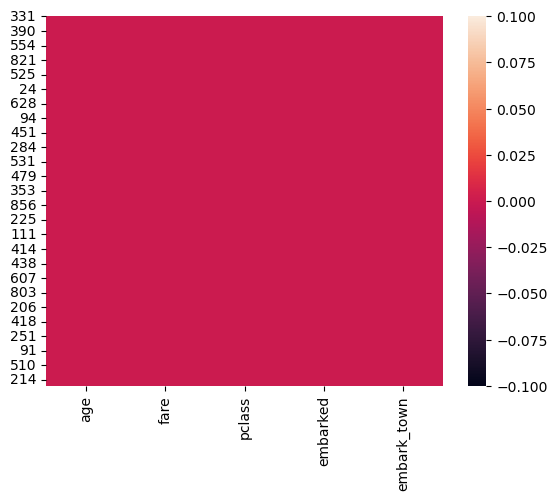

In [48]:
sns.heatmap(X_train_clean.isna())

## Summary and Key Takeaways
- **KNN Imputer** fills missing values using the average of nearest neighbors.  
- **MinMaxScaler** normalizes data to a range between 0 and 1, ensuring features contribute equally.  
- Always perform **imputation before scaling** to avoid errors and ensure consistent transformations.  

This approach creates a reusable pipeline for handling missing and scaled data before modeling.
